In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [200]:
df=pd.read_csv('stock_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA


In [201]:
df.shape

(3019, 7)

In [202]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [204]:
df.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,28.426479,28.766532,28.066558,28.412726,2.158391e+07
std,13.257242,13.356692,13.157326,13.258163,1.926231e+07
min,9.100000,9.480000,8.940000,8.950000,1.939061e+06
25%,16.175000,16.385000,15.970000,16.130000,1.248025e+07
50%,27.180000,27.490000,26.820000,27.100000,1.732130e+07
75%,36.655000,37.035000,36.305000,36.635000,2.512757e+07
max,73.020000,73.250000,72.460000,72.930000,4.382317e+08


In [205]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [206]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA


In [207]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


df = df.sort_values('Date')
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [208]:
df.tail()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA
2017-12-29,69.79,70.13,69.43,69.85,6613070,AABA


<Axes: xlabel='Date'>

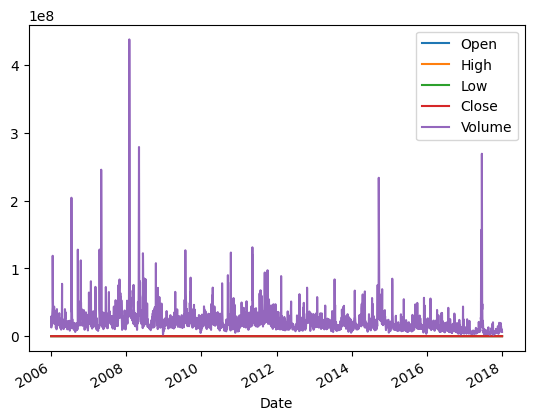

In [209]:
df.plot()

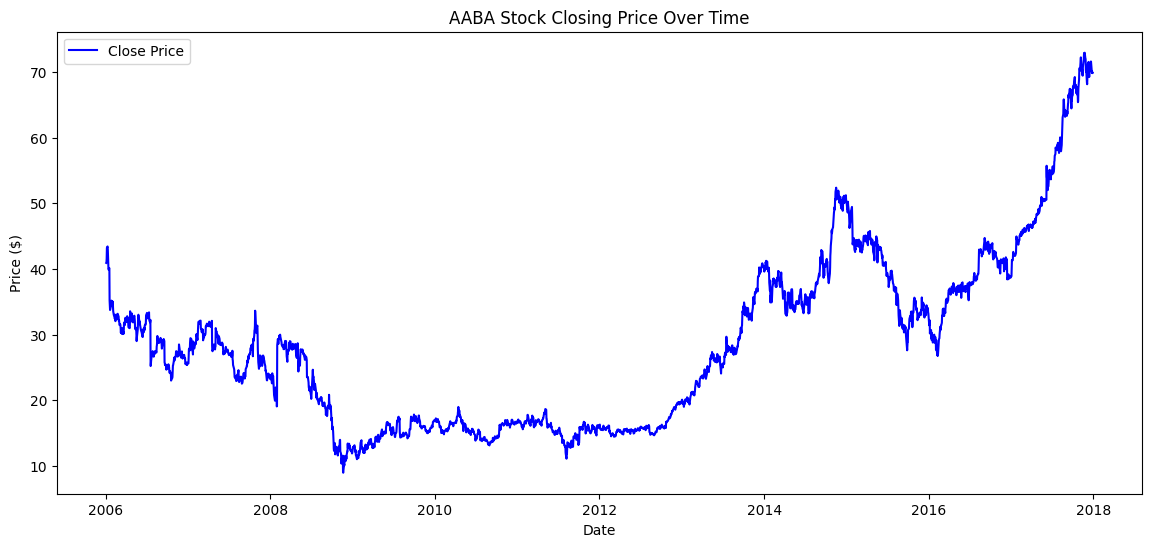

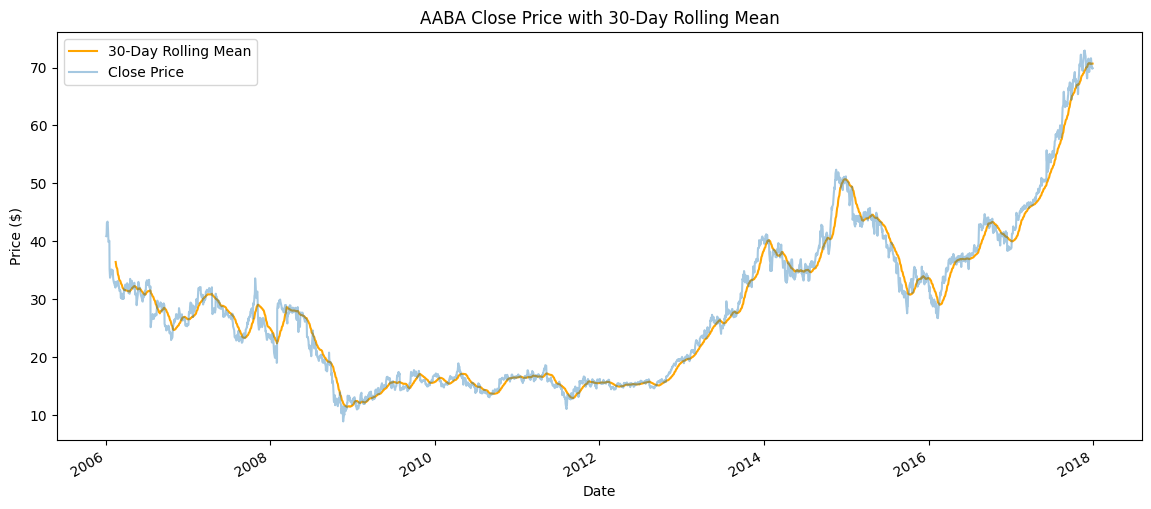

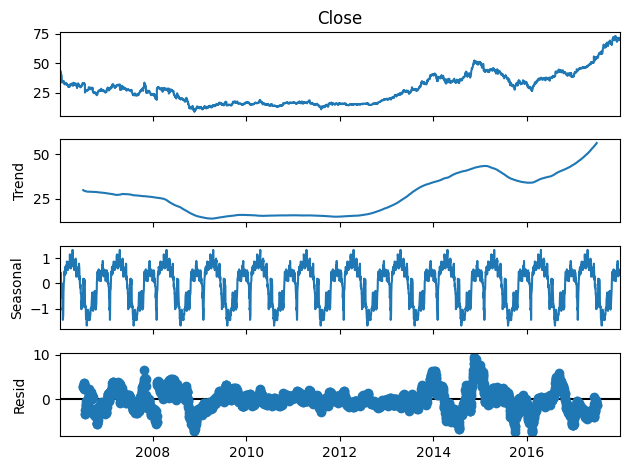

In [210]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title('AABA Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
df['Close'].rolling(window=30).mean().plot(label='30-Day Rolling Mean', color='orange')
df['Close'].plot(alpha=0.4, label='Close Price')
plt.title('AABA Close Price with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

decomposition = seasonal_decompose(df['Close'], model='additive', period=252)
decomposition.plot()
plt.tight_layout()
plt.show()


In [211]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['Close'])

adf_output = {
    'ADF Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Critical Values': adf_result[4]
}

adf_output


{'ADF Statistic': np.float64(0.9478981895596881),
 'p-value': np.float64(0.9936846299287978),
 'Critical Values': {'1%': np.float64(-3.43253236279788),
  '5%': np.float64(-2.86250422682754),
  '10%': np.float64(-2.5672832833096195)}}

In [212]:
df_diff = df['Close'].diff().dropna()

result_diff = adfuller(df_diff)
print("ADF Statistic (Differenced):", result_diff[0])
print("p-value:", result_diff[1])


ADF Statistic (Differenced): -12.447565326070878
p-value: 3.6357795917181037e-23


In [213]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Close'], order=(1, 1, 1))  
model_fit = model.fit()

print(model_fit.summary())

forecast = model_fit.forecast(steps=30)
print(forecast)


C:\Users\sindh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sindh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sindh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sindh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zer

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3019
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2887.214
Date:                Wed, 25 Jun 2025   AIC                           5780.428
Time:                        11:47:41   BIC                           5798.466
Sample:                             0   HQIC                          5786.914
                               - 3019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8006      0.131      6.107      0.000       0.544       1.058
ma.L1         -0.8253      0.124     -6.639      0.000      -1.069      -0.582
sigma2         0.3967      0.003    137.386      0.0

C:\Users\sindh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sindh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


C:\Users\sindh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sindh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sindh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sindh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zer

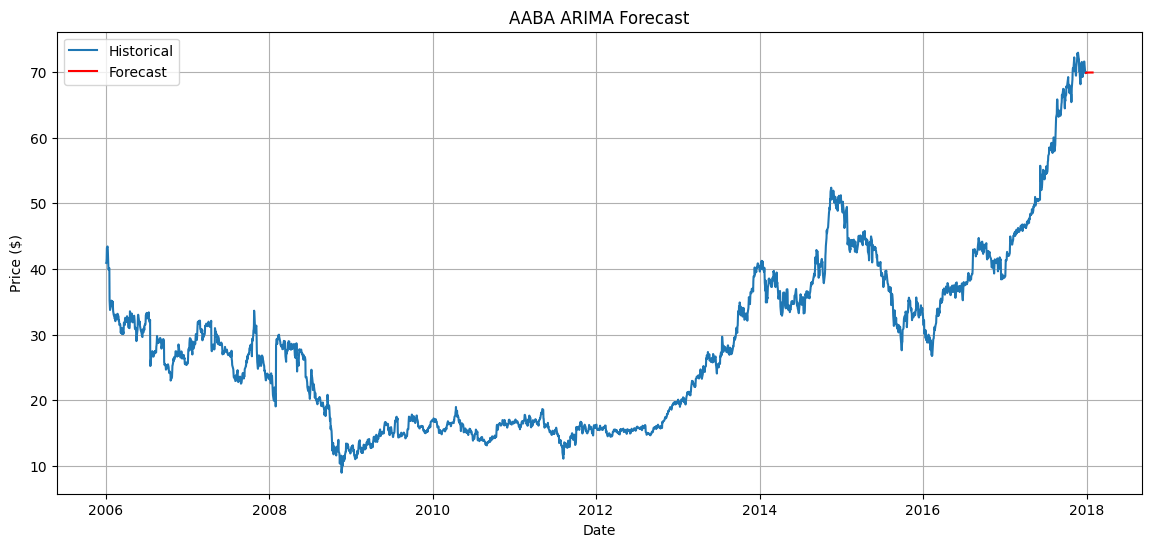

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Close'], order=(1, 1, 1))
model_fit = model.fit()

forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast = pd.Series(forecast.values, index=forecast_index)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title("AABA ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()


In [215]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model
model = SARIMAX(
    df['Close'],
    order=(1, 1, 1),           # ARIMA(p,d,q)
    seasonal_order=(1, 1, 1, 12),  # Seasonal(P,D,Q,s) — change '12' if seasonality is different
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model
model_fit = model.fit(disp=False)

# Summary
print(model_fit.summary())


C:\Users\sindh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sindh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 3019
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2856.919
Date:                            Wed, 25 Jun 2025   AIC                           5723.838
Time:                                    11:47:49   BIC                           5753.856
Sample:                                         0   HQIC                          5734.637
                                           - 3019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2759      0.784     -0.352      0.725      -1.813       1.261
ma.L1          3.8703     11.797   

C:\Users\sindh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sindh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sindh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sindh\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model

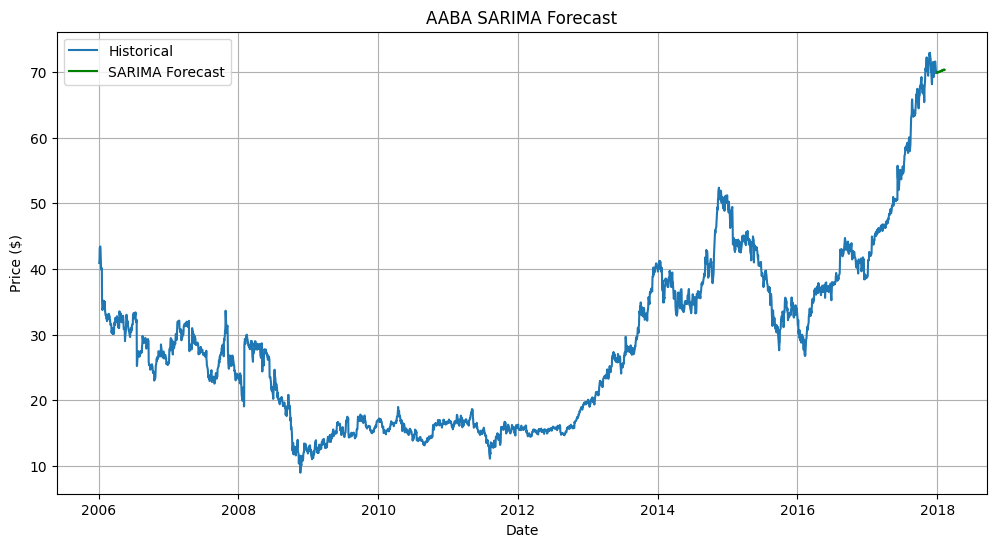

In [216]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

model = SARIMAX(
    df['Close'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
model_fit = model.fit(disp=False)

forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='B')  # 'B' = business days
forecast = pd.Series(forecast.values, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Historical')
plt.plot(forecast, label='SARIMA Forecast', color='green')
plt.title("AABA SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()


11:47:57 - cmdstanpy - INFO - Chain [1] start processing
11:48:00 - cmdstanpy - INFO - Chain [1] done processing


(<Figure size 1000x600 with 1 Axes>, <Figure size 900x1200 with 4 Axes>)

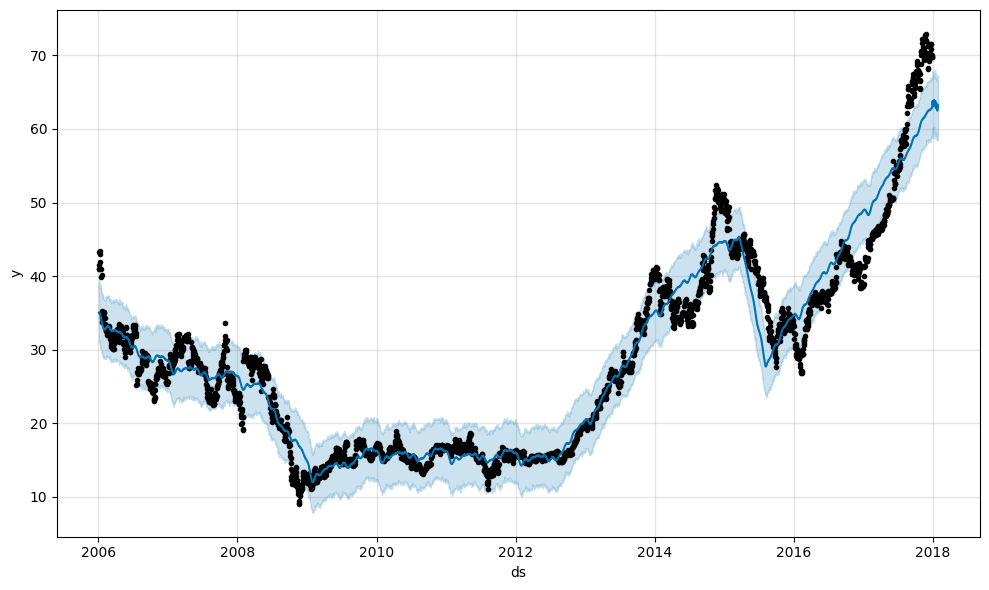

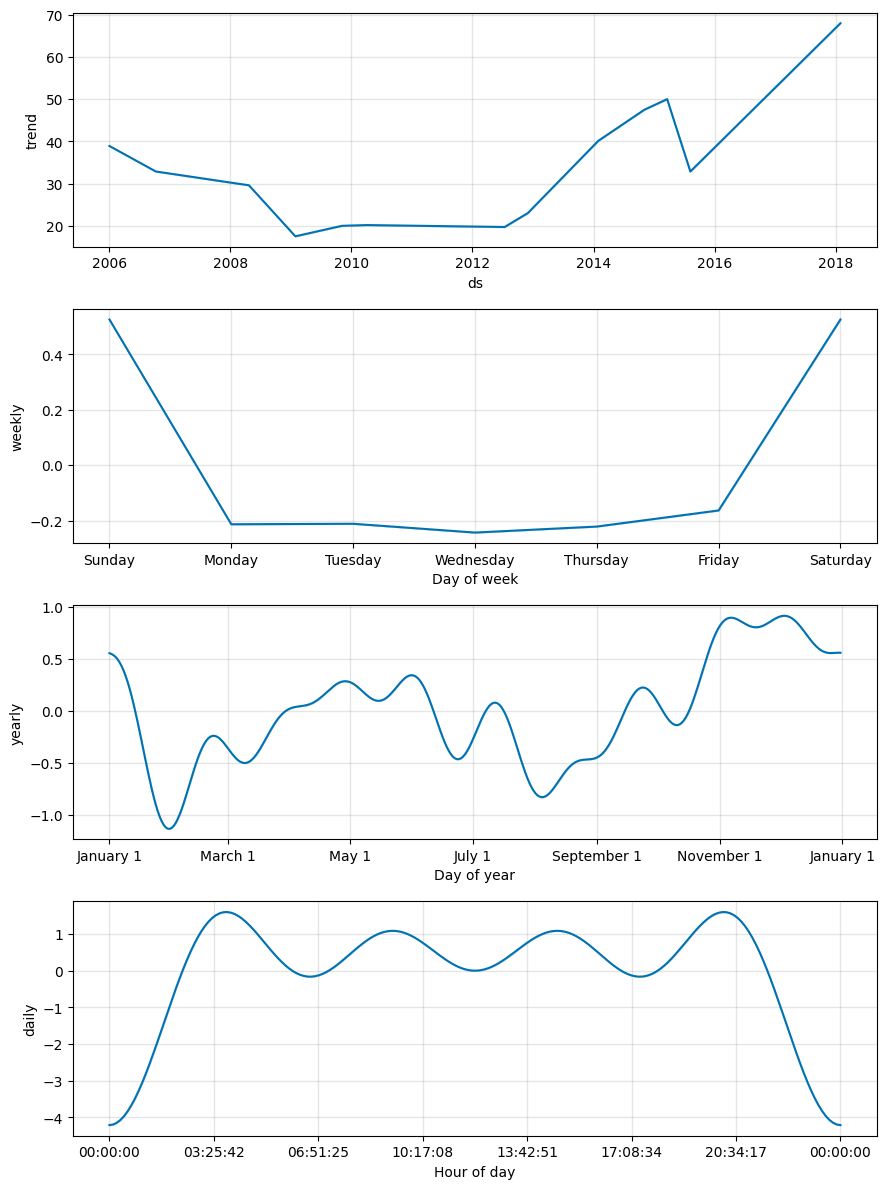

In [217]:
from prophet import Prophet

df_prophet = df[['Close']].reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})

model_prophet = Prophet(daily_seasonality=True)
model_prophet.fit(df_prophet)

future = model_prophet.make_future_dataframe(periods=30)

forecast = model_prophet.predict(future)

fig_forecast = model_prophet.plot(forecast)
fig_components = model_prophet.plot_components(forecast)

fig_forecast, fig_components


In [218]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

close_data = df[['Close']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_data)

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(scaled_data, window_size)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train = X_train.reshape((X_train.shape[0], window_size, 1))
X_val = X_val.reshape((X_val.shape[0], window_size, 1))


In [219]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense # type: ignore

model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


C:\Users\sindh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - loss: 0.0135 - val_loss: 5.3258e-04
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 4.0131e-04 - val_loss: 4.0516e-04
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 3.2575e-04 - val_loss: 3.5440e-04
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 3.2842e-04 - val_loss: 5.3468e-04
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 3.3642e-04 - val_loss: 3.3429e-04
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 3.1160e-04 - val_loss: 8.6546e-04
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 3.1095e-04 - val_loss: 5.9167e-04
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 2.8216e-04 - val_loss: 4.1250e-04
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 2.3275e-04 - val_loss: 5.0048e-04
Epoch 10/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 2.8583e-04 - val_loss: 4.7846e-04


In [220]:
last_window = scaled_data[-window_size:]
future_predictions = []

for _ in range(30):
    input_seq = last_window.reshape((1, window_size, 1))
    next_pred = model.predict(input_seq, verbose=0)[0, 0]
    
    future_predictions.append(next_pred)
    
    last_window = np.append(last_window[1:], [[next_pred]], axis=0)

future_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


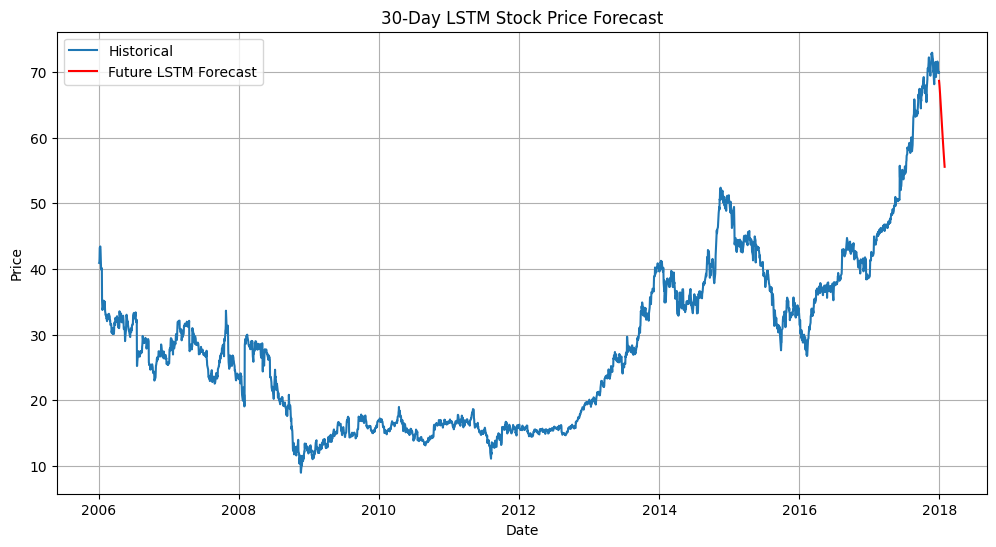

In [221]:
import matplotlib.pyplot as plt
from datetime import timedelta

last_date = df.index[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, 31)]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Historical')
plt.plot(future_dates, future_prices, label='Future LSTM Forecast', color='red')
plt.title("30-Day LSTM Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


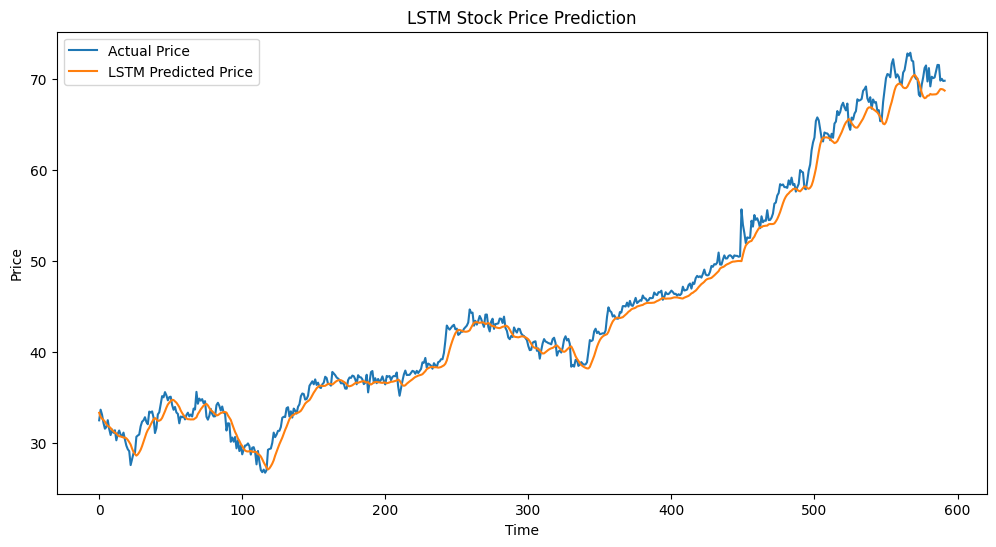

In [222]:
predicted = model.predict(X_val)

predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_val.reshape(-1, 1))

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='LSTM Predicted Price')
plt.legend()
plt.title("LSTM Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()


In [223]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [224]:
close_prices = df[['Close']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)

def create_rf_sequences(data, window=60):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_rf_sequences(scaled_data, window=window_size)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [225]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_scaled = rf_model.predict(X_test)

y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


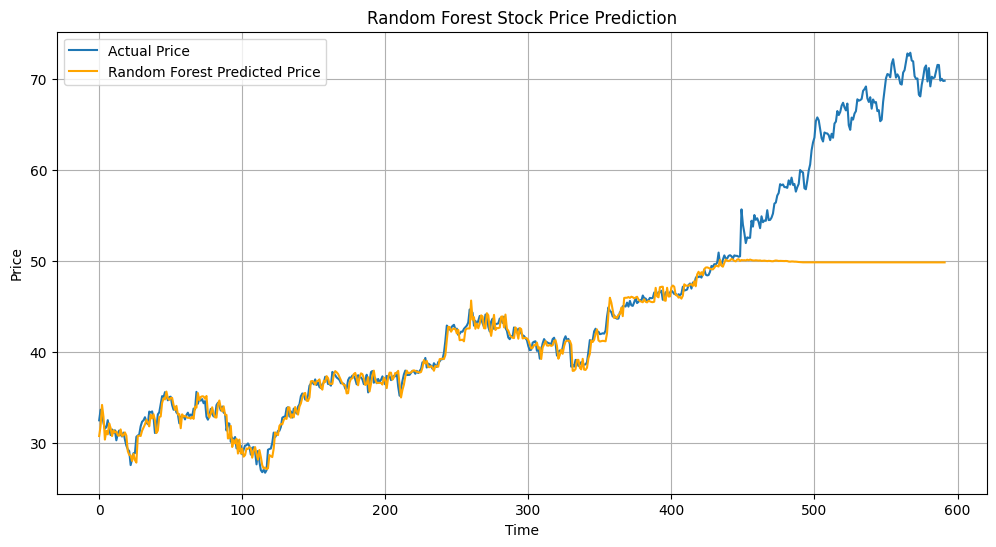

RMSE: 7.63


In [226]:
plt.figure(figsize=(12, 6))
plt.plot(y_actual, label="Actual Price")
plt.plot(y_pred, label="Random Forest Predicted Price", color='orange')
plt.title("Random Forest Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f"RMSE: {rmse:.2f}")


In [227]:
future_inputs = scaled_data[-window_size:].flatten().tolist()
future_preds = []

for _ in range(30):
    pred = rf_model.predict([future_inputs[-window_size:]])[0]
    future_preds.append(pred)
    future_inputs.append(pred)

future_prices = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))


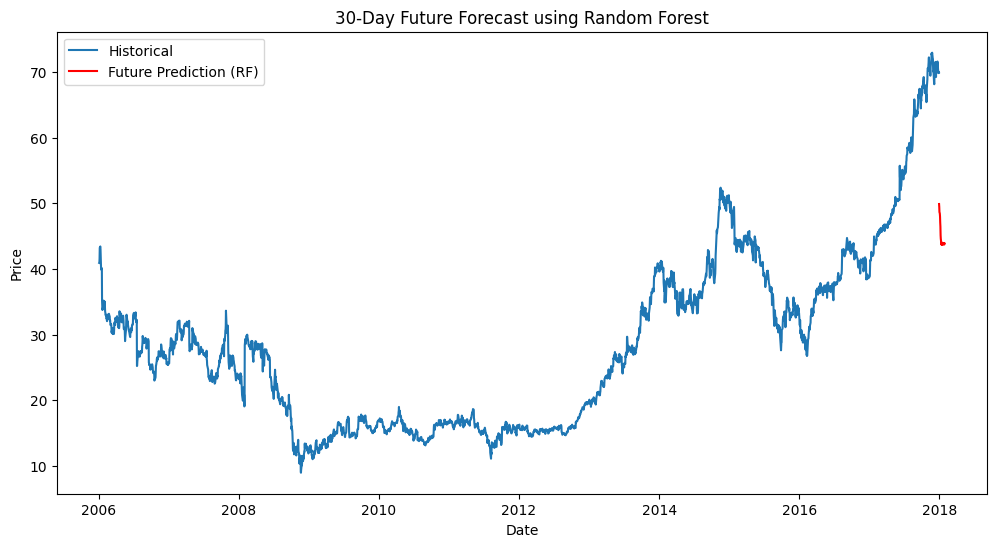

In [228]:
from datetime import timedelta

last_date = df.index[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, 31)]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Historical')
plt.plot(future_dates, future_prices, label='Future Prediction (RF)', color='red')
plt.title("30-Day Future Forecast using Random Forest")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [229]:
from keras.saving import save_model
save_model(model, 'my_model.keras')
